In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/vnstock/original/stock_data_AAA.csv')
df

,time,open,high,low,close,volume,symbol
0,2010-07-15,11.15,11.59,10.50,10.65,174100,AAA
1,2010-07-16,10.83,10.83,10.17,10.17,109200,AAA
2,2010-07-19,10.83,10.83,10.13,10.13,104900,AAA
3,2010-07-20,10.50,10.50,9.73,9.88,328700,AAA
4,2010-07-21,9.88,9.93,9.62,9.86,75800,AAA
...,...,...,...,...,...,...,...
3666,2025-03-31,8.44,8.59,8.42,8.48,2016500,AAA
3667,2025-04-01,8.50,8.59,8.50,8.53,1333000,AAA
3668,2025-04-02,8.59,8.63,8.53,8.54,1392600,AAA
3669,2025-04-03,8.24,8.31,7.95,7.95,4050100,AAA


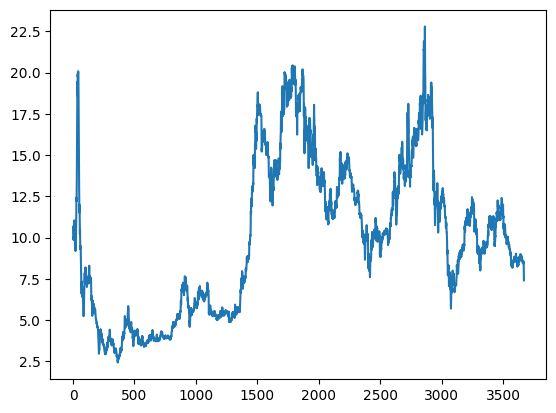

In [3]:
df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol']
close = df['Close']
plt.plot(close)

In [4]:
df['Datetime'] = pd.to_datetime(df['Time'])
df = df.drop(['Time'], axis=1)
train_df = df.loc[df['Datetime'].dt.year.isin(range(2010, 2022))]
val_df = df.loc[df['Datetime'].dt.year.isin([2022, 2023])]
test_df = df.loc[df['Datetime'].dt.year.isin([2024, 2025])]

In [5]:
train_df

,Open,High,Low,Close,Volume,Symbol,Datetime
0,11.15,11.59,10.50,10.65,174100,AAA,2010-07-15
1,10.83,10.83,10.17,10.17,109200,AAA,2010-07-16
2,10.83,10.83,10.13,10.13,104900,AAA,2010-07-19
3,10.50,10.50,9.73,9.88,328700,AAA,2010-07-20
4,9.88,9.93,9.62,9.86,75800,AAA,2010-07-21
...,...,...,...,...,...,...,...
2856,21.35,22.25,21.05,21.90,8671300,AAA,2021-12-27
2857,22.00,22.25,21.10,21.30,10859700,AAA,2021-12-28
2858,21.30,21.80,21.05,21.55,7501300,AAA,2021-12-29
2859,21.70,21.85,21.00,21.00,5194100,AAA,2021-12-30


In [6]:
val_df

,Open,High,Low,Close,Volume,Symbol,Datetime
2861,20.10,21.40,20.10,20.70,7354500,AAA,2022-01-04
2862,20.80,21.80,20.65,20.95,7187400,AAA,2022-01-05
2863,20.90,22.40,20.80,22.40,12375600,AAA,2022-01-06
2864,22.95,23.15,22.55,22.80,7009900,AAA,2022-01-07
2865,23.00,23.40,21.25,21.25,11396800,AAA,2022-01-10
...,...,...,...,...,...,...,...
3354,9.25,9.35,9.25,9.33,1555190,AAA,2023-12-25
3355,9.35,9.39,9.30,9.31,1323228,AAA,2023-12-26
3356,9.34,9.49,9.34,9.40,1999686,AAA,2023-12-27
3357,9.42,9.54,9.40,9.42,1453311,AAA,2023-12-28


In [7]:
from utils import labeling

# train_df = labeling.get_future_price(train_df, delta=7)
# val_df = labeling.get_future_price(val_df, delta=7)
# test_df = labeling.get_future_price(test_df, delta=7)

delta, threshold = labeling.calculate_threshold(train_df, delta=7)
train_df = labeling.dynamic_labeling(train_df, delta, threshold)
val_df = labeling.dynamic_labeling(val_df, delta, threshold)
test_df = labeling.dynamic_labeling(test_df, delta, threshold)

Delta = 7
Threshold gợi ý: 2.7429%

Giá trung bình trong dữ liệu: $9.73
Threshold (0.027428958090575658) thành tiền: $0.27

Phân bố nhãn với threshold riêng:
Label
HOLD    0.375613
BUY     0.326910
SELL    0.297477
Name: proportion, dtype: float64

Phân bố nhãn sau cập nhật:
Label
BUY     0.377715
HOLD    0.375613
SELL    0.246671
Name: proportion, dtype: float64

Phân bố nhãn với threshold riêng:
Label
HOLD    0.350305
SELL    0.338086
BUY     0.311609
Name: proportion, dtype: float64

Phân bố nhãn sau cập nhật:
Label
BUY     0.370672
HOLD    0.350305
SELL    0.279022
Name: proportion, dtype: float64

Phân bố nhãn với threshold riêng:
Label
HOLD    0.442623
BUY     0.278689
SELL    0.278689
Name: proportion, dtype: float64

Phân bố nhãn sau cập nhật:
Label
HOLD    0.442623
BUY     0.285246
SELL    0.272131
Name: proportion, dtype: float64


In [8]:
train_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Symbol', 'Datetime',
       'Price_t_plus_7', 'Return', 'Label', 'future_min', 'future_max'],
      dtype='object')

In [9]:
val_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Symbol', 'Datetime',
       'Price_t_plus_7', 'Return', 'Label', 'future_min', 'future_max'],
      dtype='object')

In [10]:
train_df.to_csv('data/vnstock/labelled_train.csv', index=False)
val_df.to_csv('data/vnstock/labelled_val.csv', index=False)
test_df.to_csv('data/vnstock/labelled_test.csv', index=False)

In [11]:
from utils import processing

train_df['Label'] = train_df['Label'].map(processing.map_label)
val_df['Label'] = val_df['Label'].map(processing.map_label)
test_df['Label'] = test_df['Label'].map(processing.map_label)

train_df = processing.add_basic_features(train_df)
train_df = processing.add_basic_features(train_df)
train_df = processing.add_technical_indicators(train_df)
train_df = processing.add_statistical_features(train_df, window=14)
train_df = processing.handle_missing_data(train_df, threshold=0.1)

val_df = processing.add_basic_features(val_df)
val_df = processing.add_basic_features(val_df)
val_df = processing.add_technical_indicators(val_df)
val_df = processing.add_statistical_features(val_df, window=14)
val_df = processing.handle_missing_data(val_df, threshold=0.2)

test_df = processing.add_basic_features(test_df)
test_df = processing.add_basic_features(test_df)
test_df = processing.add_technical_indicators(test_df)
test_df = processing.add_statistical_features(test_df, window=14)
test_df = processing.handle_missing_data(test_df, threshold=0.3)

train_df, val_df, test_df = processing.scale_features(train_df, val_df, test_df, excepts=['Label', 'Datetime', 'Symbol'], scaler_path='stock_scaler.pkl')

Deleted 0 cols
Deleted 0 cols
Deleted 0 cols


In [12]:
save_path = 'data/vnstock'
sequence_length = 21

feature_columns = [col for col in train_df.columns if col not in ['Datetime', 'Label', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol']]
X_train = train_df[feature_columns].values
X_val = val_df[feature_columns].values
X_test = test_df[feature_columns].values

train_path = f'{save_path}/train'
val_path = f'{save_path}/val'
test_path = f'{save_path}/test' 

train_idx_file = f'{save_path}/train_idx.txt'
val_idx_file = f'{save_path}/val_idx.txt'
test_idx_file = f'{save_path}/test_idx.txt'

target='Label'
print("Processing train data...")
n_train_samples, n_features = processing.create_sequences_sequential(X_train, train_df, sequence_length, train_path, train_idx_file, target=target, stride=1)
print("Processing validation data...")
n_val_samples, _ = processing.create_sequences_sequential(X_val, val_df, sequence_length, val_path, val_idx_file, target=target, stride=1)
print("Processing test data...")
n_test_samples, _ = processing.create_sequences_sequential(X_test, test_df, sequence_length, test_path, test_idx_file, target=target, stride=1)

Processing train data...


100%|██████████| 2800/2800 [00:00<00:00, 3620.88it/s]


Sequences saved to data/vnstock/train, shape: (2800, 21, 35)
Processing validation data...


100%|██████████| 437/437 [00:00<00:00, 3610.67it/s]


Sequences saved to data/vnstock/val, shape: (437, 21, 35)
Processing test data...


100%|██████████| 251/251 [00:00<00:00, 3626.17it/s]

Sequences saved to data/vnstock/test, shape: (251, 21, 35)


In [13]:
from utils import prepare

train_shape_path = 'data/vnstock/train/shape.txt'
val_shape_path = 'data/vnstock/val/shape.txt'
test_shape_path = 'data/vnstock/test/shape.txt'

train_loader, val_loader, test_loader = prepare.prepare_transformer_input(
    train_shape_path, val_shape_path, test_shape_path,
    data_path='data/vnstock',
    batch_size=16
)

# Kiểm tra
sample_batch = next(iter(train_loader))
print("Batch input shape:", sample_batch[0].shape)
print("Batch labels shape:", sample_batch[1].shape)
print("\nExample input shape for Transformer:", sample_batch[0][0].shape)
print(sample_batch[0][0])
print("Number of batches:", len(train_loader))

Batch input shape: torch.Size([16, 21, 35])
Batch labels shape: torch.Size([16])

Example input shape for Transformer: torch.Size([21, 35])
tensor([[ 2.0270e+00,  2.8939e+00,  1.2387e+00,  1.8814e+00,  2.1327e-01,
          6.1057e-01, -1.8823e-02,  2.5047e+00,  5.2751e+00,  6.3355e-01,
         -7.1994e-01,  1.7319e+00,  1.6542e+00,  1.7319e+00,  3.1138e+00,
          2.5174e+00,  3.1293e+00,  1.4917e+00,  8.5697e-01, -2.8700e-01,
          5.3652e+00,  8.4796e+00,  1.1787e+00, -5.1020e-02,  1.0343e+00,
          4.1742e-01,  5.3542e+00,  1.1282e+00,  2.3778e-02,  2.3956e+00,
          1.1345e+00,  2.5112e-01,  6.0469e-01,  1.2319e-01,  3.8759e+00],
        [ 1.9975e+00,  1.8490e+00,  1.4522e+00,  1.8814e+00,  1.8139e+00,
          2.6191e+00, -1.8815e-02,  2.1759e+00,  6.9380e+00,  8.6788e-01,
         -7.1042e-01,  1.7411e+00,  1.8582e+00,  1.7411e+00,  3.1348e+00,
          2.6713e+00,  3.9127e+00,  2.0327e+00,  1.0686e+00, -3.9357e-01,
          6.2264e+00,  1.0099e+01,  1.2355e+0

In [17]:
from models.inception_tf import EnhancedHybridModel

N_FEATURES = 35
model = EnhancedHybridModel(num_features=N_FEATURES) 

from torchinfo import summary
print(summary(model, (32, 21, 35)))

Layer (type:depth-idx)                        Output Shape              Param #
EnhancedHybridModel                           [32, 3]                   --
├─Sequential: 1-1                             [32, 128, 10]             --
│    └─InceptionModule: 2-1                   [32, 128, 21]             --
│    │    └─Conv1d: 3-1                       [32, 32, 21]              1,152
│    │    └─Conv1d: 3-2                       [32, 32, 21]              3,392
│    │    └─Conv1d: 3-3                       [32, 32, 21]              5,632
│    │    └─Sequential: 3-4                   [32, 32, 21]              1,152
│    └─ReLU: 2-2                              [32, 128, 21]             --
│    └─MaxPool1d: 2-3                         [32, 128, 10]             --
│    └─InceptionModule: 2-4                   [32, 128, 10]             --
│    │    └─Conv1d: 3-5                       [32, 32, 10]              4,128
│    │    └─Conv1d: 3-6                       [32, 32, 10]              12,320
│

In [18]:
import torch
import torch.nn as nn
from utils import training
from sklearn.utils.class_weight import compute_class_weight

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_train_samples, _, _ = prepare.load_shape('data/vnstock/train/shape.txt')
train_labels = np.memmap(f'data/vnstock/train/labels.dat', dtype=np.int64, mode='r', 
                              shape=(n_train_samples,))
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(train_labels), 
    y=train_labels
)
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32).to(DEVICE))

optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [19]:
NUM_EPOCHS = 50
PATIENCE = 10
MIN_DELTA = 0.0001
torch.cuda.empty_cache()

# model = nn.DataParallel(model)
    
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# early_stopping = training.EarlyStopping(patience=PATIENCE, min_delta=MIN_DELTA)

best_val_acc = 0
for epoch in range(NUM_EPOCHS):
    print(f'Epoch [{epoch + 1}/{NUM_EPOCHS}]')
    
    train_loss, train_acc = training.train_model(model, train_loader, criterion, optimizer, DEVICE)
    val_loss, val_acc = training.eval_model(model, val_loader, criterion, DEVICE)
    
    print(f'\tTrain Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%')
    print(f'\tVal Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%')
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    if val_acc > best_val_acc:
        print('########################### SAVED MODEL ##############################')
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'save/models/vnstock/inception.pth')
    
    # Kiểm tra Early Stopping
    # early_stopping(val_loss)
    # if early_stopping.early_stop:
    #     print("Early stopping triggered!")
    #     break
    print('===================================================')

Epoch [1/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 130.05batch/s]


	Train Loss: 1.1472, Train Accuracy: 36.25%
	Val Loss: 1.1132, Val Accuracy: 36.61%
########################### SAVED MODEL ##############################
Epoch [2/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 135.25batch/s]


	Train Loss: 1.1223, Train Accuracy: 35.21%
	Val Loss: 1.0978, Val Accuracy: 37.99%
########################### SAVED MODEL ##############################
Epoch [3/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 155.55batch/s]


	Train Loss: 1.1141, Train Accuracy: 37.25%
	Val Loss: 1.0978, Val Accuracy: 37.53%
Epoch [4/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 151.33batch/s]


	Train Loss: 1.1134, Train Accuracy: 35.82%
	Val Loss: 1.0984, Val Accuracy: 37.53%
Epoch [5/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 143.55batch/s]


	Train Loss: 1.1060, Train Accuracy: 36.43%
	Val Loss: 1.0941, Val Accuracy: 37.76%
Epoch [6/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 135.90batch/s]


	Train Loss: 1.0946, Train Accuracy: 39.14%
	Val Loss: 1.0955, Val Accuracy: 38.22%
########################### SAVED MODEL ##############################
Epoch [7/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 142.75batch/s]


	Train Loss: 1.0774, Train Accuracy: 41.07%
	Val Loss: 1.0653, Val Accuracy: 44.39%
########################### SAVED MODEL ##############################
Epoch [8/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 134.87batch/s]


	Train Loss: 1.0033, Train Accuracy: 51.14%
	Val Loss: 1.0183, Val Accuracy: 49.89%
########################### SAVED MODEL ##############################
Epoch [9/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 145.24batch/s]


	Train Loss: 0.9120, Train Accuracy: 59.32%
	Val Loss: 0.9893, Val Accuracy: 54.92%
########################### SAVED MODEL ##############################
Epoch [10/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 155.89batch/s]


	Train Loss: 0.8350, Train Accuracy: 62.82%
	Val Loss: 0.8892, Val Accuracy: 56.98%
########################### SAVED MODEL ##############################
Epoch [11/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 151.32batch/s]


	Train Loss: 0.8370, Train Accuracy: 63.46%
	Val Loss: 0.8953, Val Accuracy: 59.95%
########################### SAVED MODEL ##############################
Epoch [12/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 163.07batch/s]


	Train Loss: 0.8020, Train Accuracy: 65.54%
	Val Loss: 0.8342, Val Accuracy: 62.93%
########################### SAVED MODEL ##############################
Epoch [13/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 144.15batch/s]


	Train Loss: 0.7960, Train Accuracy: 65.89%
	Val Loss: 0.8457, Val Accuracy: 60.18%
Epoch [14/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 147.43batch/s]


	Train Loss: 0.7759, Train Accuracy: 66.61%
	Val Loss: 0.8515, Val Accuracy: 61.33%
Epoch [15/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 161.37batch/s]


	Train Loss: 0.7362, Train Accuracy: 69.39%
	Val Loss: 0.9115, Val Accuracy: 61.10%
Epoch [16/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 152.32batch/s]


	Train Loss: 0.7135, Train Accuracy: 70.82%
	Val Loss: 0.8201, Val Accuracy: 63.62%
########################### SAVED MODEL ##############################
Epoch [17/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 147.54batch/s]


	Train Loss: 0.7016, Train Accuracy: 72.11%
	Val Loss: 0.7773, Val Accuracy: 63.39%
Epoch [18/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 159.84batch/s]


	Train Loss: 0.6733, Train Accuracy: 73.00%
	Val Loss: 0.8099, Val Accuracy: 64.07%
########################### SAVED MODEL ##############################
Epoch [19/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 160.06batch/s]


	Train Loss: 0.6327, Train Accuracy: 74.68%
	Val Loss: 0.8651, Val Accuracy: 65.90%
########################### SAVED MODEL ##############################
Epoch [20/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 151.65batch/s]


	Train Loss: 0.6253, Train Accuracy: 75.89%
	Val Loss: 0.9915, Val Accuracy: 60.64%
Epoch [21/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 154.67batch/s]


	Train Loss: 0.6353, Train Accuracy: 75.21%
	Val Loss: 0.8390, Val Accuracy: 65.90%
Epoch [22/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 135.05batch/s]


	Train Loss: 0.6065, Train Accuracy: 76.25%
	Val Loss: 1.0494, Val Accuracy: 56.52%
Epoch [23/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 141.28batch/s]


	Train Loss: 0.5780, Train Accuracy: 78.32%
	Val Loss: 0.8596, Val Accuracy: 63.84%
Epoch [24/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 134.82batch/s]


	Train Loss: 0.5828, Train Accuracy: 77.61%
	Val Loss: 0.8632, Val Accuracy: 65.90%
Epoch [25/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 144.78batch/s]


	Train Loss: 0.5272, Train Accuracy: 79.96%
	Val Loss: 0.9671, Val Accuracy: 61.56%
Epoch [26/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 135.25batch/s]


	Train Loss: 0.5318, Train Accuracy: 79.11%
	Val Loss: 0.8816, Val Accuracy: 62.01%
Epoch [27/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 154.72batch/s]


	Train Loss: 0.5010, Train Accuracy: 81.71%
	Val Loss: 1.0898, Val Accuracy: 54.69%
Epoch [28/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 155.76batch/s]


	Train Loss: 0.5051, Train Accuracy: 81.54%
	Val Loss: 0.9534, Val Accuracy: 64.99%
Epoch [29/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 154.67batch/s]


	Train Loss: 0.4832, Train Accuracy: 82.32%
	Val Loss: 0.9269, Val Accuracy: 64.07%
Epoch [30/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 149.61batch/s]


	Train Loss: 0.4692, Train Accuracy: 82.96%
	Val Loss: 0.9376, Val Accuracy: 61.78%
Epoch [31/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 154.66batch/s]


	Train Loss: 0.4459, Train Accuracy: 84.43%
	Val Loss: 0.9208, Val Accuracy: 66.13%
########################### SAVED MODEL ##############################
Epoch [32/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 145.52batch/s]


	Train Loss: 0.4326, Train Accuracy: 83.68%
	Val Loss: 1.0253, Val Accuracy: 64.30%
Epoch [33/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 149.25batch/s]


	Train Loss: 0.4348, Train Accuracy: 84.46%
	Val Loss: 1.0338, Val Accuracy: 61.56%
Epoch [34/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 153.20batch/s]


	Train Loss: 0.4420, Train Accuracy: 84.64%
	Val Loss: 0.9465, Val Accuracy: 64.07%
Epoch [35/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 154.12batch/s]


	Train Loss: 0.3941, Train Accuracy: 86.68%
	Val Loss: 1.0023, Val Accuracy: 65.22%
Epoch [36/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 146.20batch/s]


	Train Loss: 0.3867, Train Accuracy: 86.29%
	Val Loss: 1.0548, Val Accuracy: 65.22%
Epoch [37/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 152.27batch/s]


	Train Loss: 0.3666, Train Accuracy: 86.86%
	Val Loss: 1.1085, Val Accuracy: 62.01%
Epoch [38/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 149.97batch/s]


	Train Loss: 0.3651, Train Accuracy: 87.07%
	Val Loss: 1.0720, Val Accuracy: 61.78%
Epoch [39/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 144.54batch/s]


	Train Loss: 0.3656, Train Accuracy: 86.71%
	Val Loss: 1.0145, Val Accuracy: 69.57%
########################### SAVED MODEL ##############################
Epoch [40/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 153.91batch/s]


	Train Loss: 0.2977, Train Accuracy: 89.64%
	Val Loss: 1.1679, Val Accuracy: 66.59%
Epoch [41/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 141.39batch/s]


	Train Loss: 0.3614, Train Accuracy: 88.07%
	Val Loss: 1.2640, Val Accuracy: 63.84%
Epoch [42/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 137.55batch/s]


	Train Loss: 0.3170, Train Accuracy: 89.46%
	Val Loss: 1.1502, Val Accuracy: 64.30%
Epoch [43/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 148.91batch/s]


	Train Loss: 0.3184, Train Accuracy: 88.79%
	Val Loss: 1.2185, Val Accuracy: 64.76%
Epoch [44/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 131.94batch/s]


	Train Loss: 0.3136, Train Accuracy: 89.39%
	Val Loss: 1.1055, Val Accuracy: 65.68%
Epoch [45/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 130.68batch/s]


	Train Loss: 0.2715, Train Accuracy: 91.32%
	Val Loss: 1.1406, Val Accuracy: 66.13%
Epoch [46/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 131.32batch/s]


	Train Loss: 0.2957, Train Accuracy: 90.18%
	Val Loss: 1.4694, Val Accuracy: 59.27%
Epoch [47/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 157.75batch/s]


	Train Loss: 0.2658, Train Accuracy: 91.14%
	Val Loss: 1.3137, Val Accuracy: 65.45%
Epoch [48/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 146.58batch/s]


	Train Loss: 0.3156, Train Accuracy: 89.64%
	Val Loss: 1.2213, Val Accuracy: 64.07%
Epoch [49/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 149.71batch/s]


	Train Loss: 0.3083, Train Accuracy: 89.29%
	Val Loss: 1.1159, Val Accuracy: 66.36%
Epoch [50/50]


	Evaluating: 100%|██████████| 28/28 [00:00<00:00, 150.45batch/s]

	Train Loss: 0.2566, Train Accuracy: 91.46%
	Val Loss: 1.2452, Val Accuracy: 65.45%


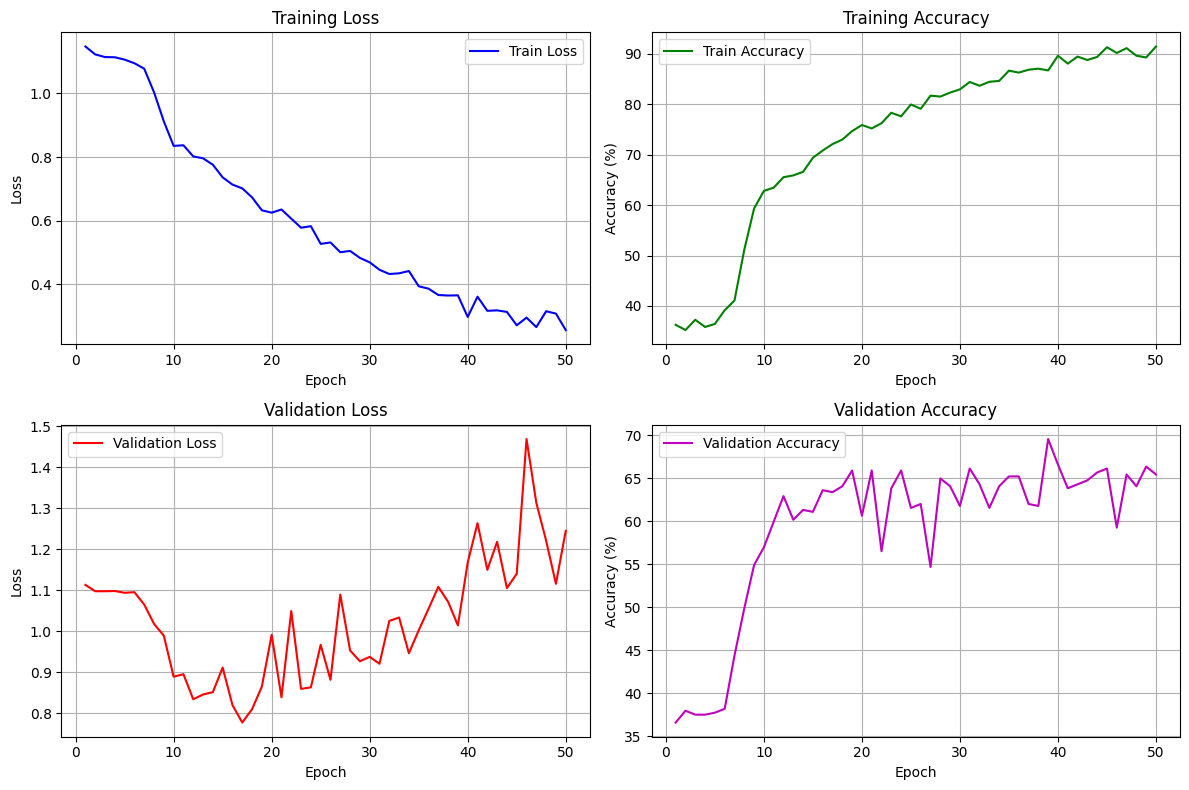

In [20]:
training.plot_training_results(train_losses, train_accs, val_losses, val_accs)

In [21]:
best_model = EnhancedHybridModel(num_features=N_FEATURES)
best_model.load_state_dict(torch.load('save/models/vnstock/inception.pth', weights_only=True))

<All keys matched successfully>

In [22]:
training.test_model(model, train_loader, DEVICE)

Confusion matrix:
      BUY  SELL  HOLD
BUY   982     6    52
SELL   39   630    21
HOLD   71    21   978
Classification Report:
              precision    recall  f1-score   support

         BUY     0.8993    0.9442    0.9212      1040
        SELL     0.9589    0.9130    0.9354       690
        HOLD     0.9305    0.9140    0.9222      1070

    accuracy                         0.9250      2800
   macro avg     0.9296    0.9238    0.9263      2800
weighted avg     0.9259    0.9250    0.9251      2800



In [23]:
training.test_model(model, val_loader, DEVICE)

Confusion matrix:
      BUY  SELL  HOLD
BUY   109    11    40
SELL   25    83    16
HOLD   36    23    94
Classification Report:
              precision    recall  f1-score   support

         BUY     0.6412    0.6813    0.6606       160
        SELL     0.7094    0.6694    0.6888       124
        HOLD     0.6267    0.6144    0.6205       153

    accuracy                         0.6545       437
   macro avg     0.6591    0.6550    0.6566       437
weighted avg     0.6555    0.6545    0.6546       437



In [24]:
training.test_model(model, test_loader, DEVICE)

Confusion matrix:
      BUY  SELL  HOLD
BUY    28     2    30
SELL    4    48    25
HOLD    8    10    96
Classification Report:
              precision    recall  f1-score   support

         BUY     0.7000    0.4667    0.5600        60
        SELL     0.8000    0.6234    0.7007        77
        HOLD     0.6358    0.8421    0.7245       114

    accuracy                         0.6853       251
   macro avg     0.7119    0.6440    0.6618       251
weighted avg     0.7015    0.6853    0.6779       251



In [25]:
batch = next(iter(test_loader))
inputs, labels = batch[0], batch[1]

print('Prediction:  ', training.get_prediction(model, inputs, DEVICE))
print('Ground truth:', labels.cpu().numpy())

Prediction:   [0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 0]
Ground truth: [0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0]
